# Spark NLP Quick Start
### How to use Spark NLP pretrained pipelines

We will first set up the runtime environment and then load pretrained Entity Recognition model and Sentiment analysis model and give it a quick test. Feel free to test the models on your own sentences / datasets.

In [1]:
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2021-06-03 21:59:29--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2021-06-03 21:59:29--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1608 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.57K  --.-KB/s    in 0s      

2021-06-03 21:59:29 (37.3 MB/s) - written to stdout [1608/1608]

setup Cola

In [2]:
import sparknlp
spark = sparknlp.start()

print("Spark NLP version: {}".format(sparknlp.version()))
print("Apache Spark version: {}".format(spark.version))

Spark NLP version: 3.0.3
Apache Spark version: 3.0.2


In [3]:
from sparknlp.pretrained import PretrainedPipeline 

Let's use Spark NLP pre-trained pipeline for `named entity recognition`

In [4]:
pipeline = PretrainedPipeline('recognize_entities_dl', 'en')

recognize_entities_dl download started this may take some time.
Approx size to download 160.1 MB
[OK!]


In [5]:
result = pipeline.annotate('President Biden represented Delaware for 36 years in the U.S. Senate before becoming the 47th Vice President of the United States.') 

In [6]:
print(result['ner'])
print(result['entities'])

['O', 'B-PER', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'O']
['Biden', 'Delaware', 'U.S', 'Senate', 'United States']


Let's try another Spark NLP pre-trained pipeline for `named entity recognition`

In [ ]:
pipeline = PretrainedPipeline('onto_recognize_entities_bert_tiny', 'en')

result = pipeline.annotate("Johnson first entered politics when elected in 2001 as a member of Parliament. He then served eight years as the mayor of London, from 2008 to 2016, before rejoining Parliament.")

print(result['ner'])
print(result['entities'])

onto_recognize_entities_bert_tiny download started this may take some time.
Approx size to download 30.2 MB
[OK!]
['B-PERSON', 'B-ORDINAL', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'O', 'B-DATE', 'I-DATE', 'O', 'O', 'O', 'O', 'B-GPE', 'O', 'B-DATE', 'O', 'B-DATE', 'O', 'O', 'O', 'B-ORG']
['Johnson', 'first', '2001', 'Parliament.', 'eight years', 'London,', '2008', '2016', 'Parliament.']


Let's use Spark NLP pre-trained pipeline for `sentiment` analysis

In [ ]:
pipeline = PretrainedPipeline('analyze_sentimentdl_glove_imdb', 'en')

analyze_sentimentdl_glove_imdb download started this may take some time.
Approx size to download 155.3 MB
[OK!]


In [ ]:
result = pipeline.annotate("Harry Potter is a great movie.")

In [ ]:
print(result['sentiment'])

['pos']


In [7]:
from sparknlp.base import DocumentAssembler

In [8]:
documentAssembler = DocumentAssembler()\
  .setInputCol("abstract")\
  .setOutputCol("document")

In [9]:
from sparknlp.annotator import (Tokenizer, Normalizer,
                                LemmatizerModel, StopWordsCleaner)
tokenizer = Tokenizer() \
     .setInputCols(['document']) \
     .setOutputCol('token')

In [10]:
from sparknlp.base import Finisher, DocumentAssembler
from pyspark.ml import Pipeline

# note normalizer defaults to changing all words to lowercase.
# Use .setLowercase(False) to maintain input case.
normalizer = Normalizer() \
     .setInputCols(['token']) \
     .setOutputCol('normalized') \
     .setLowercase(True)
# note that lemmatizer needs a dictionary. So I used the pre-trained
# model (note that it defaults to english)
lemmatizer = LemmatizerModel.pretrained() \
     .setInputCols(['normalized']) \
     .setOutputCol('clean_lemma')

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]


In [11]:
# finisher converts tokens to human-readable output
finisher = Finisher() \
     .setInputCols(['clean_lemma']) \
     .setCleanAnnotations(False)

In [12]:
pipeline = Pipeline() \
     .setStages([
           documentAssembler,
           tokenizer,
           normalizer,
           lemmatizer,
           finisher
     ])

In [13]:
!pip install wget

In [14]:
import wget
wget.download('https://s3.amazonaws.com/data.patentsview.org/download/patent.tsv.zip','sample_data/patent.tsv.zip')

from zipfile import ZipFile
  
# specifying the zip file name
file_name = "sample_data/patent.tsv.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
patent.tsv                                     2021-03-04 23:42:36   6005805218
Extracting all the files now...
Done!


In [15]:
data = spark.read.csv('patent.tsv',
                      sep="\t",
                      header=True,
                      inferSchema=True)
data.printSchema()

root
 |-- id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- number: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- title: string (nullable = true)
 |-- kind: string (nullable = true)
 |-- num_claims: integer (nullable = true)
 |-- filename: string (nullable = true)
 |-- withdrawn: integer (nullable = true)



In [16]:
data.show(5)

+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+
|      id|   type|  number|country|      date|            abstract|               title|kind|num_claims|     filename|withdrawn|
+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+
|10000000|utility|10000000|     US|2018-06-19|A frequency modul...|Coherent LADAR us...|  B2|        20|ipg180619.xml|        0|
|10000001|utility|10000001|     US|2018-06-19|The injection mol...|Injection molding...|  B2|        12|ipg180619.xml|        0|
|10000002|utility|10000002|     US|2018-06-19|The present inven...|Method for manufa...|  B2|         9|ipg180619.xml|        0|
|10000003|utility|10000003|     US|2018-06-19|The invention rel...|Method for produc...|  B2|        18|ipg180619.xml|        0|
|10000004|utility|10000004|     US|2018-06-19|The present inven...|Process of obtain...|  B2|    

In [17]:
data = data.filter(data['withdrawn']==0)

In [18]:
data = data.withColumn('year',data['date'].substr(1,4))

In [19]:
data.show(5)

+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+
|      id|   type|  number|country|      date|            abstract|               title|kind|num_claims|     filename|withdrawn|year|
+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+
|10000000|utility|10000000|     US|2018-06-19|A frequency modul...|Coherent LADAR us...|  B2|        20|ipg180619.xml|        0|2018|
|10000001|utility|10000001|     US|2018-06-19|The injection mol...|Injection molding...|  B2|        12|ipg180619.xml|        0|2018|
|10000002|utility|10000002|     US|2018-06-19|The present inven...|Method for manufa...|  B2|         9|ipg180619.xml|        0|2018|
|10000003|utility|10000003|     US|2018-06-19|The invention rel...|Method for produc...|  B2|        18|ipg180619.xml|        0|2018|
|10000004|utility|10000004|     US|2018-06-19|The present inve

In [20]:
from pyspark.sql.types import IntegerType
data = data.withColumn('year',data['year'].cast(IntegerType()))

In [21]:
data.printSchema()

root
 |-- id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- number: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- title: string (nullable = true)
 |-- kind: string (nullable = true)
 |-- num_claims: integer (nullable = true)
 |-- filename: string (nullable = true)
 |-- withdrawn: integer (nullable = true)
 |-- year: integer (nullable = true)



In [22]:
data = data.filter(data['year']>2010)

# **Preprocessing**

In [23]:
text = pipeline.fit(data).transform(data)

In [24]:
text.show(5)

+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+--------------------+--------------------+--------------------+--------------------+--------------------+
|      id|   type|  number|country|      date|            abstract|               title|kind|num_claims|     filename|withdrawn|year|            document|               token|          normalized|         clean_lemma|finished_clean_lemma|
+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+--------------------+--------------------+--------------------+--------------------+--------------------+
|10000000|utility|10000000|     US|2018-06-19|A frequency modul...|Coherent LADAR us...|  B2|        20|ipg180619.xml|        0|2018|[[document, 0, 94...|[[token, 0, 0, A,...|[[token, 0, 0, a,...|[[token, 0, 0, a,...|[a, frequency, mo...|
|10000001|utility|10000001|     US|2018-06-1

# **EDA**

In [25]:
text.createOrReplaceTempView('text')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69fa7fb790>],
      dtype=object)

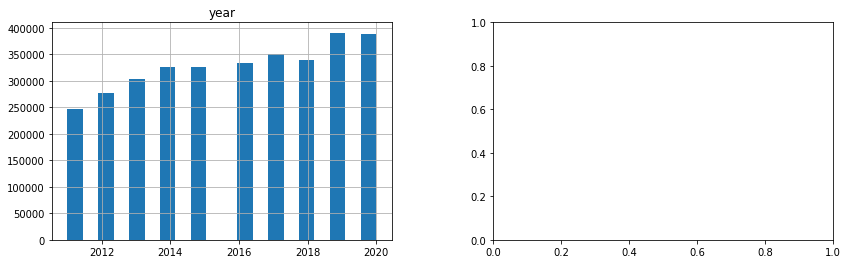

In [26]:
import pandas as pd
pd.set_option('display.max_columns',100, 'display.max_colwidth',1000, 'display.max_rows',1000, 
              'display.float_format', lambda x: '%.2f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, figsize=(14,4))
data.select('year').toPandas().hist(bins=20, ax=ax[0])

# **Word Freq**

In [33]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

from textblob import TextBlob

In [28]:
from pyspark.sql.functions import explode, col
equifax_words = text.withColumn('exploded_text', explode(col('finished_clean_lemma')))

In [29]:
equifax_words.show(5)

+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+
|      id|   type|  number|country|      date|            abstract|               title|kind|num_claims|     filename|withdrawn|year|            document|               token|          normalized|         clean_lemma|finished_clean_lemma|exploded_text|
+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+
|10000000|utility|10000000|     US|2018-06-19|A frequency modul...|Coherent LADAR us...|  B2|        20|ipg180619.xml|        0|2018|[[document, 0, 94...|[[token, 0, 0, A,...|[[token, 0, 0, a,...|[[token, 0, 0, a,...|[a, frequency, mo...|   

In [30]:
def remove_stopwords(x):    
    sw = stopwords.words("english")
    string = ''
    for x in x.split(' '):
        if x.lower() not in sw:
            string += x + ' '
        else:
            pass
    return string

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from pyspark.sql.functions import from_unixtime, to_date, year, udf, explode, split, col, length, rank, dense_rank, avg, sum

nosw = udf(remove_stopwords)
spark.udf.register("nosw", nosw)
tweets = text.withColumn('text_nosw',nosw('title'))

In [49]:
def flat_list(column):
    corpus = []
    for row in column:
        for w in row.split(' '):
            corpus.append(w)
    return corpus

def corpus_creator(text_col):
    corpus = text_col.rdd \
                    .flatMap(flat_list) \
                    .map(lambda x: (x, 1)) \
                    .reduceByKey(lambda x, y: x+y ) \
                    .sortBy(lambda x: x[1], ascending=False) \
                    .toDF() \
                    .withColumnRenamed('_1','text') \
                    .withColumnRenamed('_2','count')
    return corpus

In [36]:
def annual_tweets(year):
    annual_tweets = tweets.select('text_nosw').filter(text.year==year)    
    return annual_tweets


In [37]:
tweets.show(5)

+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      id|   type|  number|country|      date|            abstract|               title|kind|num_claims|     filename|withdrawn|year|            document|               token|          normalized|         clean_lemma|finished_clean_lemma|           text_nosw|
+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|10000000|utility|10000000|     US|2018-06-19|A frequency modul...|Coherent LADAR us...|  B2|        20|ipg180619.xml|        0|2018|[[document, 0, 94...|[[token, 0, 0, A,...|[[token, 0, 0, a,...|[[token, 0, 0, a,...|[a,

In [48]:
annual_tweets(2010)

DataFrame[text_nosw: string]

In [88]:
tweets.select('text_nosw').filter(text.year==2010)

DataFrame[text_nosw: string]

In [45]:
def wordcloud(corpus_sdf):
    corpus_pdf = corpus_sdf.limit(500).toPandas()

    corpus_dict = {}
    for index, row in corpus_pdf.iterrows():
        corpus_dict[row['text']] = row['count']
        
    wordcloud = WordCloud().generate_from_frequencies(corpus_dict)
    plt.imshow(wordcloud);


In [43]:
years_list = [2020]

In [ ]:
annual_corpora = {}
for year in years_list:
    annual_corpora[str(year)] = corpus_creator(annual_tweets(year))

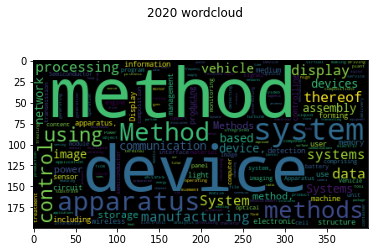

In [92]:
for key,value in annual_corpora.items():
    fig, ax = plt.subplots()
    ax = wordcloud(value)
    fig.suptitle('{} wordcloud'.format(key))

In [93]:
years_list = [2019,2018,2017,2016]

In [94]:
annual_corpora = {}
for year in years_list:
    annual_corpora[str(year)] = corpus_creator(annual_tweets(year))

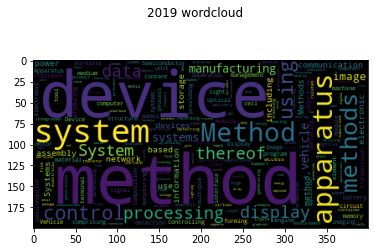

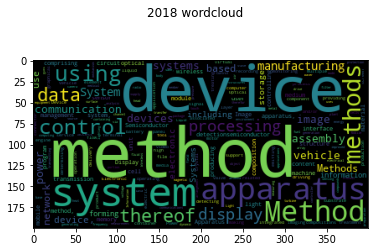

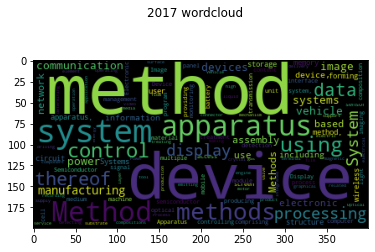

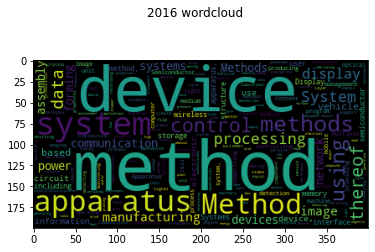

In [95]:
for key,value in annual_corpora.items():
    fig, ax = plt.subplots()
    ax = wordcloud(value)
    fig.suptitle('{} wordcloud'.format(key))

In [99]:
years_list = [2015,2014,2013]

In [100]:
annual_corpora = {}
for year in years_list:
    annual_corpora[str(year)] = corpus_creator(annual_tweets(year))

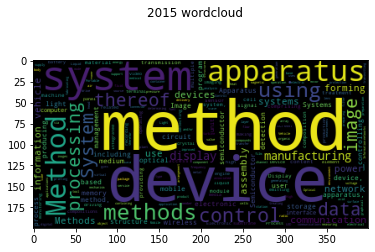

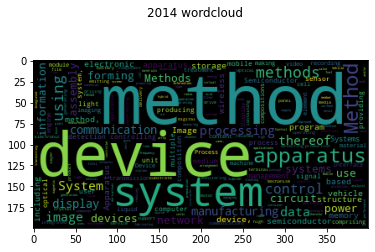

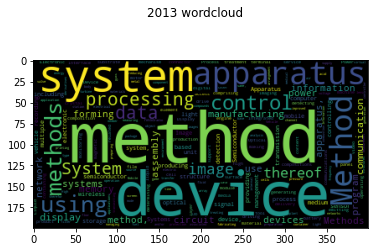

In [101]:
for key,value in annual_corpora.items():
    fig, ax = plt.subplots()
    ax = wordcloud(value)
    fig.suptitle('{} wordcloud'.format(key))

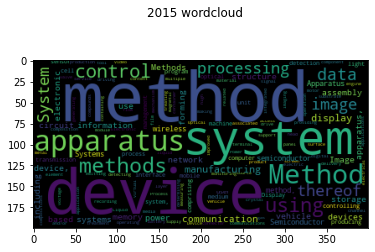

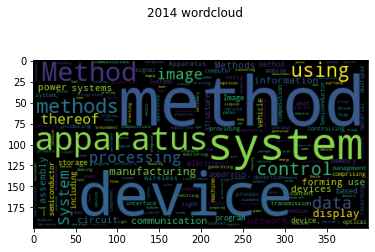

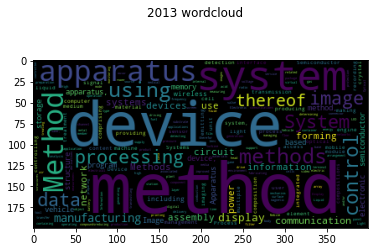

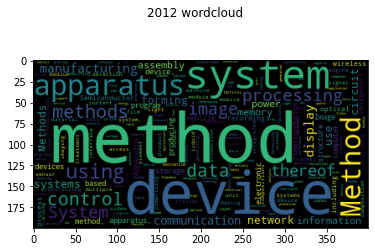

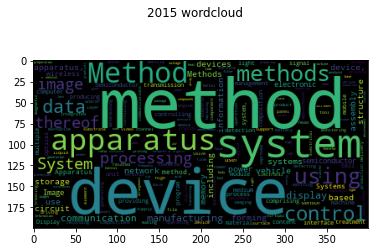

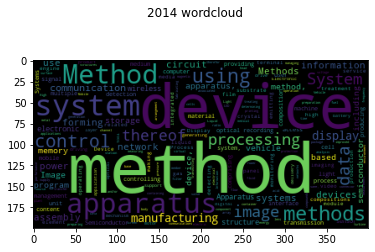

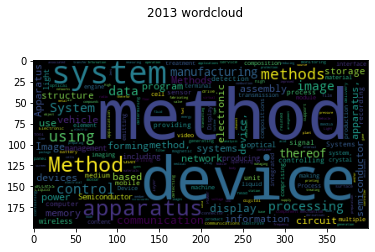

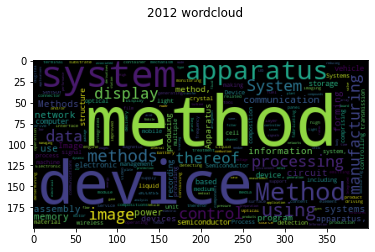

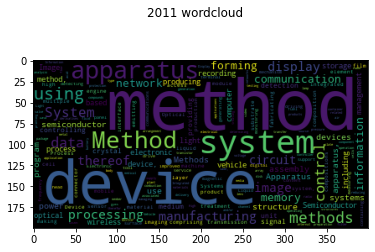

In [107]:
years_list = [2012,2011]
for year in years_list:
    annual_corpora[str(year)] = corpus_creator(annual_tweets(year))

In [113]:
annual_corpora['2011'].show(10)

+---------+------+
|     text| count|
+---------+------+
|         |247800|
|   method| 42777|
|   device| 30616|
|   system| 27727|
|apparatus| 26138|
|   Method| 24843|
|    using| 11481|
|  methods|  9244|
|  control|  8349|
|     data|  8060|
+---------+------+
only showing top 10 rows



In [114]:
annual_corpora['2012'].show(10)

+---------+------+
|     text| count|
+---------+------+
|         |276924|
|   method| 48122|
|   device| 34320|
|   system| 31716|
|apparatus| 28720|
|   Method| 27627|
|    using| 12592|
|  methods| 10748|
|  control|  9687|
|     data|  9230|
+---------+------+
only showing top 10 rows



In [116]:
years_list = [2020,2019,2018]
for year in years_list:
    annual_corpora[str(year)] = corpus_creator(annual_tweets(year))

In [119]:
annual_corpora['2020'].show(10)

+----------+------+
|      text| count|
+----------+------+
|          |388926|
|    method| 61661|
|    device| 52971|
|    system| 43275|
| apparatus| 29162|
|    Method| 26513|
|   methods| 23113|
|     using| 16376|
|   control| 14968|
|processing| 12431|
+----------+------+
only showing top 10 rows



In [56]:
annual_corpora2020 = annual_corpora['2020'].toPandas()

In [138]:
annual_corpora2020.describe(['count']).show()

+-------+-----------------+
|summary|            count|
+-------+-----------------+
|  count|           100259|
|   mean|26.56350053361793|
| stddev|1286.273660046386|
|    min|                1|
|    max|           388926|
+-------+-----------------+



In [ ]:
#sns.displot(annual_corpora2020)

In [135]:
type(annual_corpora2020)

pyspark.sql.dataframe.DataFrame

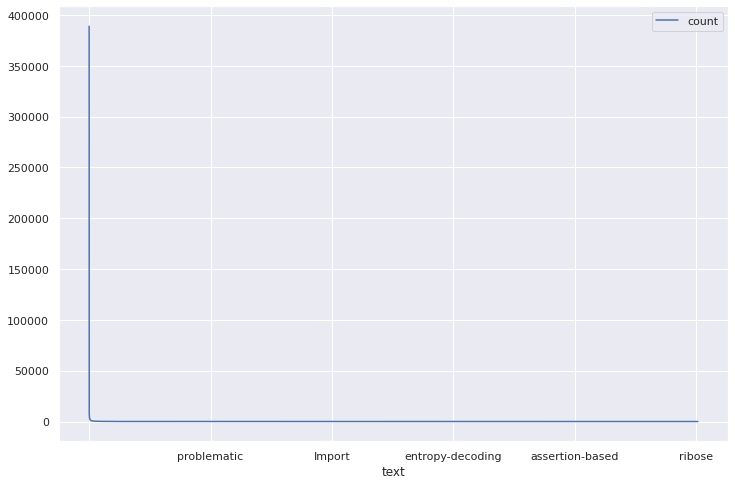

In [140]:
annual_corpora2020.plot(x='text',y='count')
plt.show()

In [54]:
years_list = [2011]
for year in years_list:
    annual_corpora[str(year)] = corpus_creator(annual_tweets(year))

In [97]:
import pandas as pd
import seaborn as sns

In [100]:
def viz_word_freq(year):
  annual_corpora2020 = annual_corpora[str(year)].toPandas()
  df = annual_corpora2020[1:100]
  sns.set(rc={'figure.figsize':(11.7,8.27)})

  sns.barplot(x="text", y="count", data=df_2020[:80],
                 palette="Blues_d")
  plt.xticks(rotation=90)
  plt.title("Word Frequency - {} Patent Title Data".format(year))

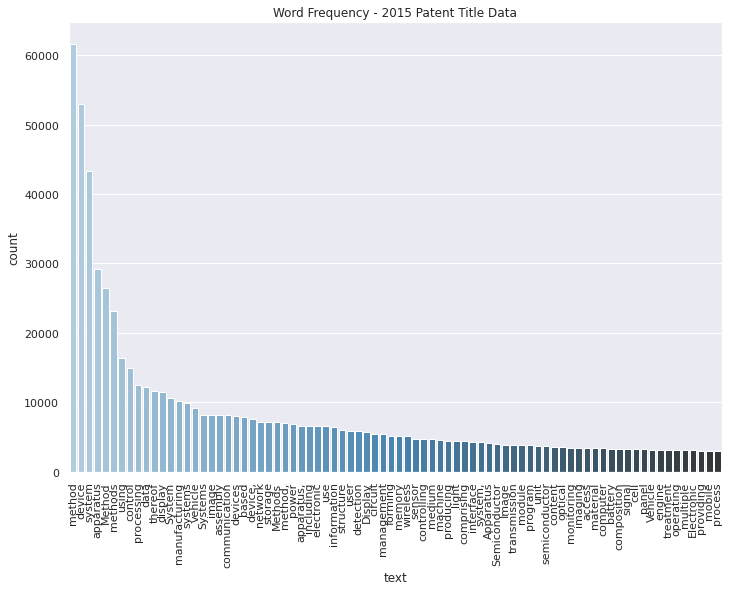

In [101]:
viz_word_freq(2015)

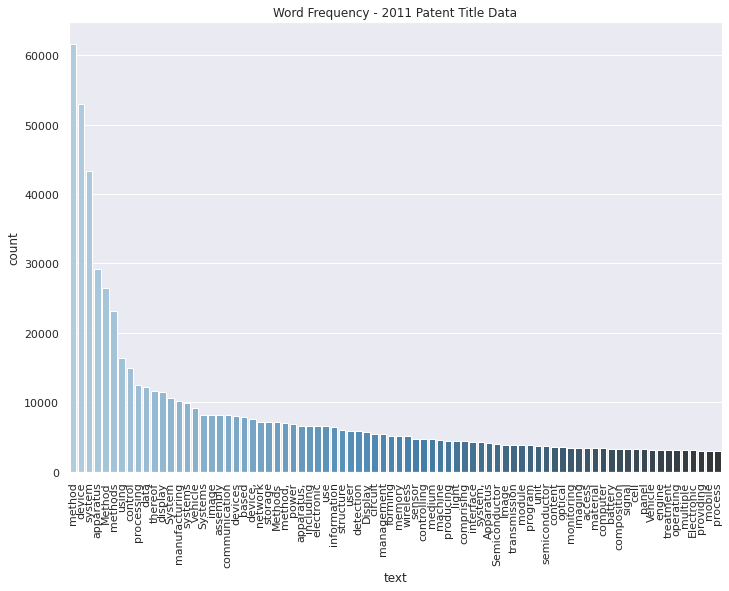

In [102]:
viz_word_freq(2011)

In [61]:
df_2020 = annual_corpora2020[1:100]
df_2020.head()

text  count
1     method  61661
2     device  52971
3     system  43275
4  apparatus  29162
5     Method  26513

Text(0.5, 1.0, 'Word Frequency - 2020 Patent Title Data')

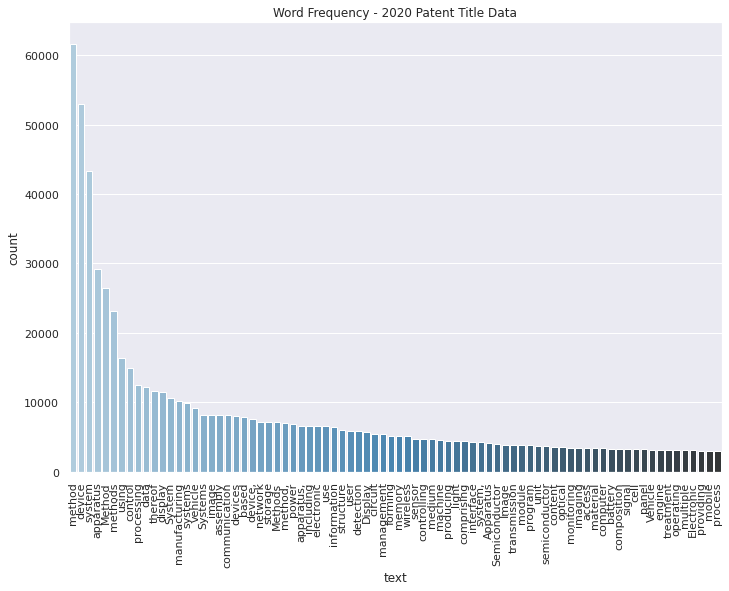

In [96]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x="text", y="count", data=df_2020[:80],
                 palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Word Frequency - 2020 Patent Title Data")

In [55]:
annual_corpora

{'2011': DataFrame[text: string, count: bigint],
 '2015': DataFrame[text: string, count: bigint],
 '2020': DataFrame[text: string, count: bigint]}

# **Different CPC number**

In [104]:
tweets.show(5)

+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      id|   type|  number|country|      date|            abstract|               title|kind|num_claims|     filename|withdrawn|year|            document|               token|          normalized|         clean_lemma|finished_clean_lemma|           text_nosw|
+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|10000000|utility|10000000|     US|2018-06-19|A frequency modul...|Coherent LADAR us...|  B2|        20|ipg180619.xml|        0|2018|[[document, 0, 94...|[[token, 0, 0, A,...|[[token, 0, 0, a,...|[[token, 0, 0, a,...|[a,

In [107]:
tweets = tweets.withColumn('CPC',tweets['kind'].substr(1,1))

In [108]:
tweets.show(5)

+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---+
|      id|   type|  number|country|      date|            abstract|               title|kind|num_claims|     filename|withdrawn|year|            document|               token|          normalized|         clean_lemma|finished_clean_lemma|           text_nosw|CPC|
+--------+-------+--------+-------+----------+--------------------+--------------------+----+----------+-------------+---------+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---+
|10000000|utility|10000000|     US|2018-06-19|A frequency modul...|Coherent LADAR us...|  B2|        20|ipg180619.xml|        0|2018|[[document, 0, 94...|[[token, 0, 0, A,...|[[token, 0, 0, a,...|[[token, 0, 

In [122]:
def CPC_tweets(cpc):
    annual_tweets = tweets.select('text_nosw').filter(tweets.CPC==cpc)    
    return annual_tweets

In [114]:
tweets.groupBy('CPC').count().show()

+---+-------+
|CPC|  count|
+---+-------+
|  E|   6315|
|  B|2990655|
|  S| 276328|
|  P|  11103|
|  H|     44|
+---+-------+



In [115]:
tweets.groupBy('kind').count().show()

+----+-------+
|kind|  count|
+----+-------+
|  H1|     44|
|  P2|   6626|
|  B2|2741945|
|  P3|   4477|
|  B1| 248710|
|  E1|   6315|
|  S1| 276328|
+----+-------+



In [118]:
kinds_lst = ['E','B','S','P','H']
kind_corpora={}

In [123]:
for kind in kinds_lst:
    kind_corpora[kind] = corpus_creator(CPC_tweets(kind))

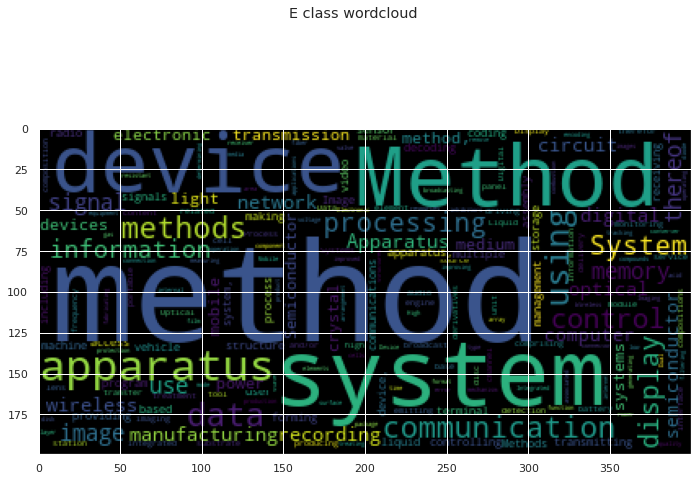

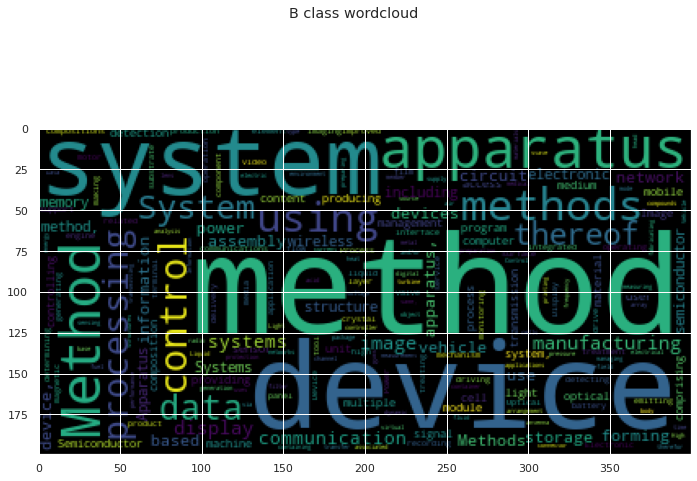

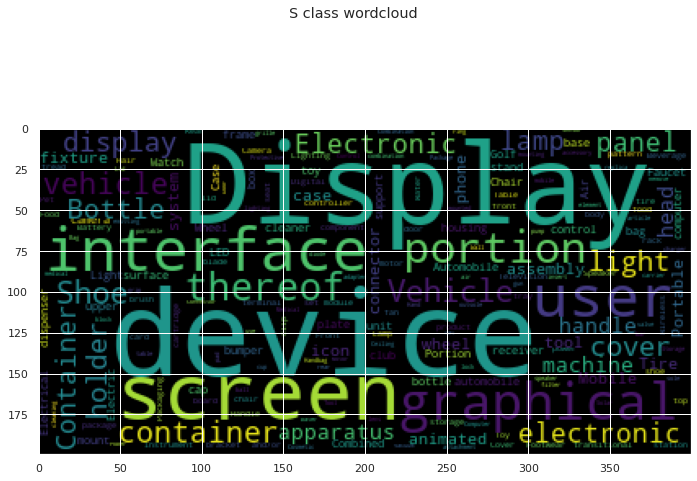

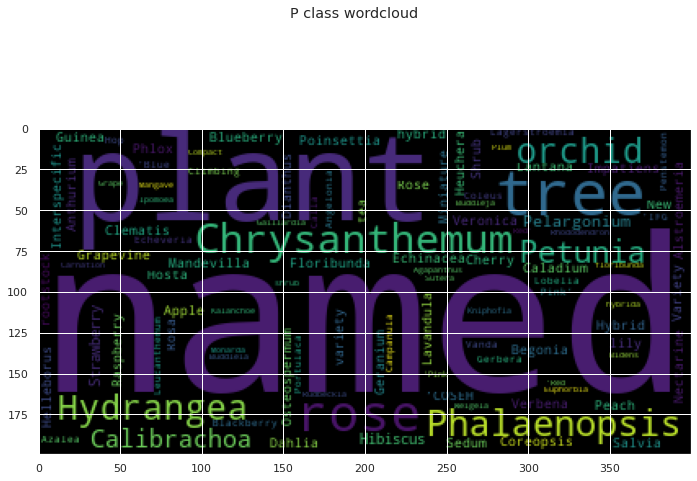

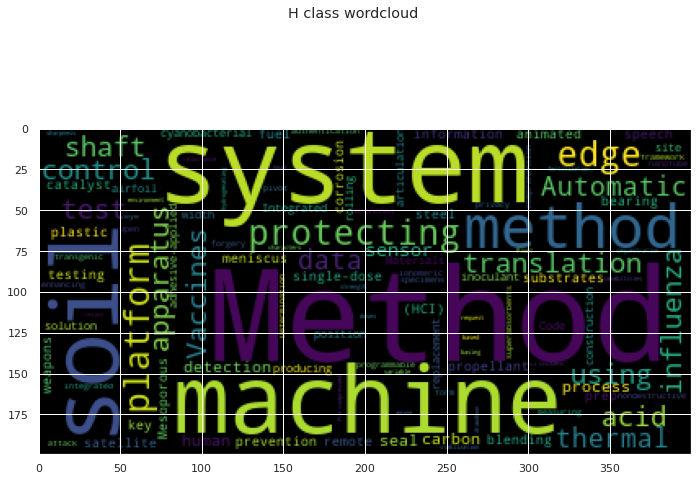

In [125]:
for key,value in kind_corpora.items():
    fig, ax = plt.subplots()
    ax = wordcloud(value)
    fig.suptitle('{} class wordcloud'.format(key))

In [128]:
def viz_word_freq2(year):
  annual_corpora2020 = kind_corpora[year].toPandas()
  df = annual_corpora2020[1:100]
  sns.set(rc={'figure.figsize':(11.7,8.27)})

  sns.barplot(x="text", y="count", data=df_2020[:80],
                 palette="Blues_d")
  plt.xticks(rotation=90)
  plt.title("Word Frequency - {} Patent Title Data".format(year))

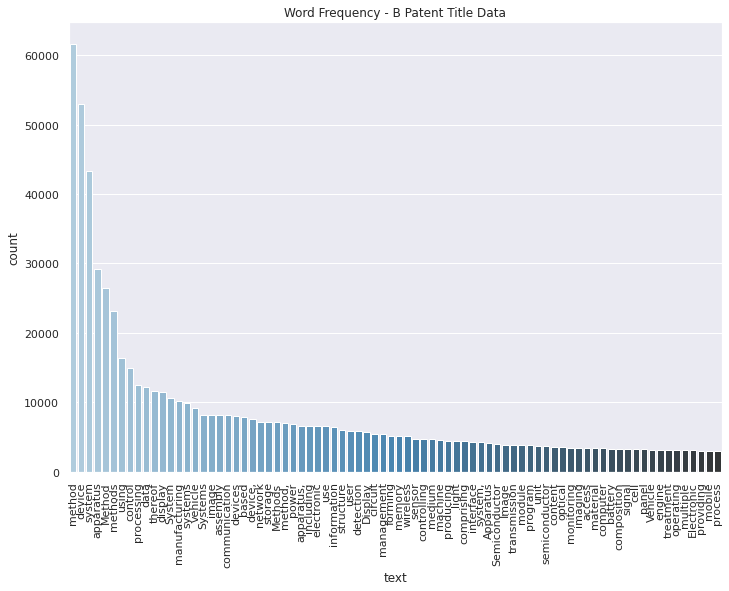

In [129]:
viz_word_freq2('B')

# **Entity Recognition**

In [131]:
def make_string(x):
    string = ''
    for x in x:
        string += x + ' '
    return string

make_string = udf(make_string)
spark.udf.register("make_string", make_string)

pipeline = PretrainedPipeline('explain_document_dl', 'en')

explain_document_dl download started this may take some time.
Approx size to download 169.3 MB
[OK!]


In [132]:
annual_entities = {}
for year in years_list:
    entities_filtered = pipeline.transform(annual_corpora[str(year)]) \
                                .select('text','count',
                                        col('entities.result').alias('entities'),
                                        col('pos.result').alias('pos'))
    entities_filtered = entities_filtered.withColumn('entities',make_string('entities'))\
                                        .withColumn('pos',make_string('pos'))\
                                        .filter('entities <> ""')
    annual_entities[str(year)] = entities_filtered
    

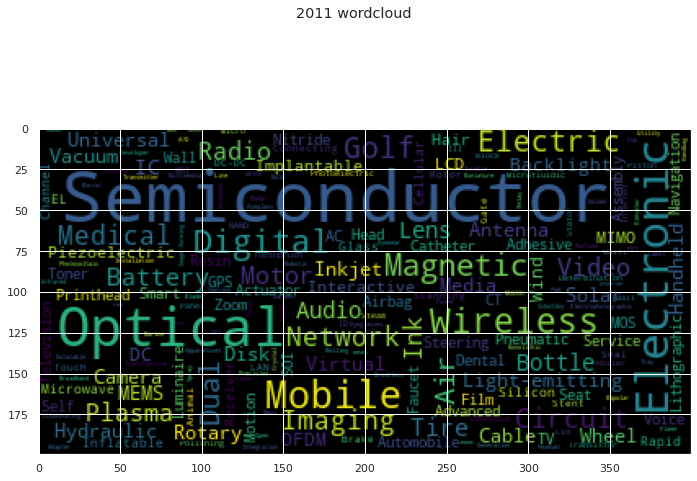

In [133]:
for key,value in annual_entities.items():
    fig, ax = plt.subplots()
    ax = wordcloud(value)
    fig.suptitle('{} wordcloud'.format(key))

In [135]:
years_list = [2011,2015,2020]

In [136]:
annual_entities = {}
for year in years_list:
    entities_filtered = pipeline.transform(annual_corpora[str(year)]) \
                                .select('text','count',
                                        col('entities.result').alias('entities'),
                                        col('pos.result').alias('pos'))
    entities_filtered = entities_filtered.withColumn('entities',make_string('entities'))\
                                        .withColumn('pos',make_string('pos'))\
                                        .filter('entities <> ""')
    annual_entities[str(year)] = entities_filtered
    

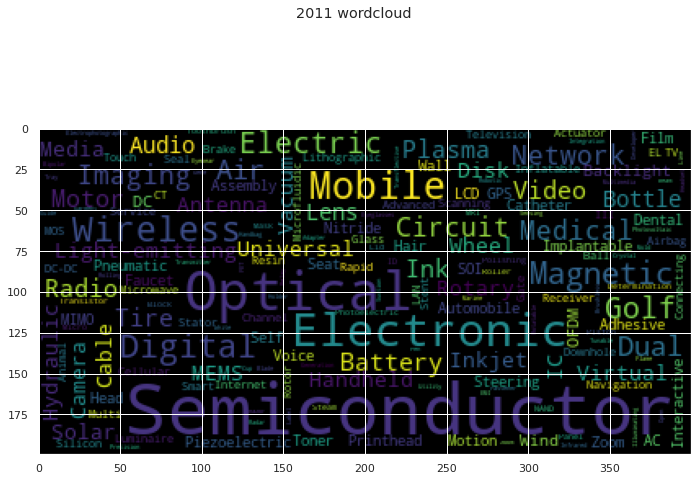

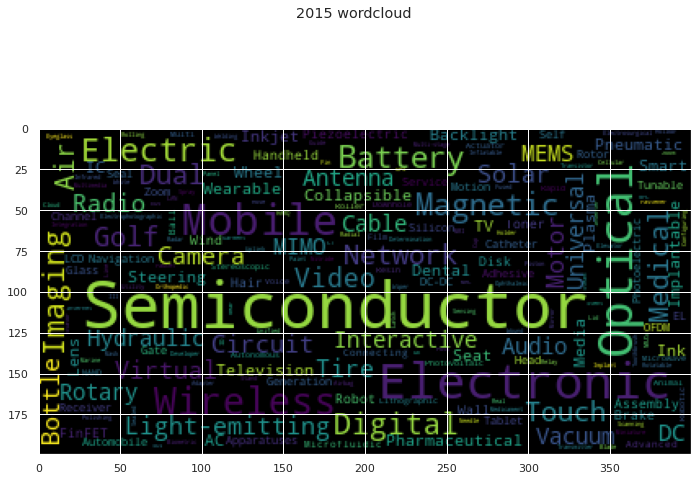

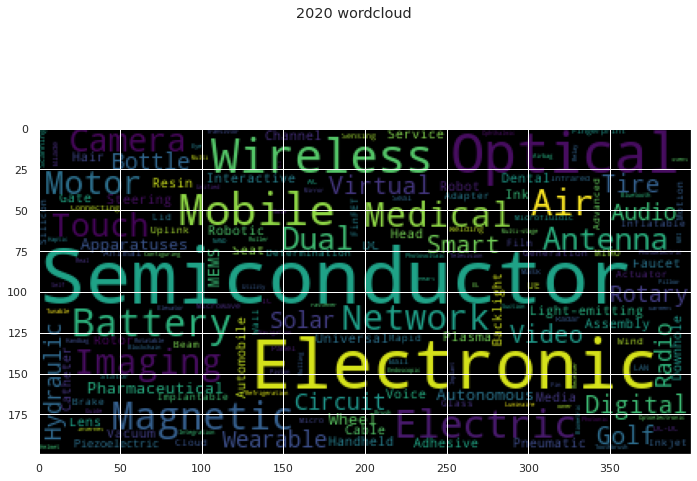

In [137]:
for key,value in annual_entities.items():
    fig, ax = plt.subplots()
    ax = wordcloud(value)
    fig.suptitle('{} wordcloud'.format(key))